In [4]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage import exposure
import numpy as np

# === 1. Загружаем исходное изображение ===
img = imread('image.jpg')  # ← замени на своё изображение
if img.ndim == 3:
    gray = rgb2gray(img)
else:
    gray = img / 255.0

# === 2. Сжимаем диапазон яркости (низкий контраст)
low_contrast = np.clip(0.3 + gray * 0.4, 0, 1)
imsave('my-landscape.png', (low_contrast * 255).astype(np.uint8))

# === 3. Выравнивание гистограммы (histogram equalization)
equalized = exposure.equalize_hist(low_contrast)
imsave('my-landscape-histeq.png', (equalized * 255).astype(np.uint8))



C:\Users\stacy\AppData\Local\Temp\ipykernel_33284\3766820271.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img);
c:\Users\stacy\venv\Lib\site-packages\skimage\util\dtype.py:576: UserWarning: Downcasting int64 to uint8 without scaling because max value 243 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\stacy\AppData\Local\Temp\ipykernel_33284\3766820271.py:49: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img_hist);


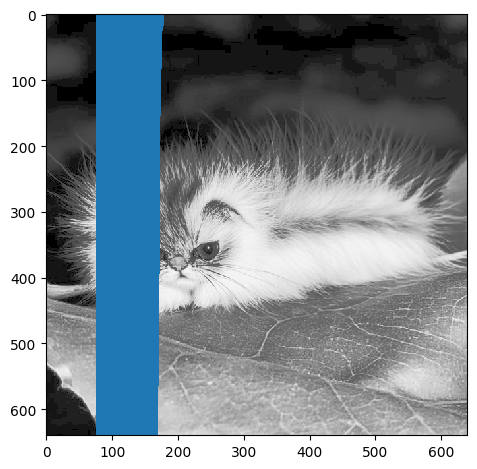

In [ ]:
from skimage.io import imread, imshow, imsave

img = imread('my-low-contrast.png')

imshow(img);
img.min()
img.max()

img.shape

from matplotlib.pyplot import hist

values, bin_edges, patches = hist(img.ravel(), bins=range(257))

values
values[0]
values[255]

len(values)

import numpy as np

from itertools import accumulate
cdf = np.array(list(accumulate(values)))
cdf
cdf[0]
cdf.size
cdf[255]
cdf[cdf != 0].min()

img_hist = np.round((cdf[img] - cdf[cdf != 0].min()) / (img.size - 1) * 255)
img_hist.dtype
img_hist.min(), img_hist.max()

img_landscape = imread('my-landscape-histeq.png')

np.array_equal(img_hist, img_landscape)

from skimage import img_as_ubyte

img_hist = img_as_ubyte(img_hist.astype('int'))

img_hist
img_landscape
img_landscape.dtype
imshow(img_hist);

imsave('landscape-my.png', img_hist)
